In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [16]:
train = pd.read_csv("train.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(train)

,Missing Values,% of Total Values
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [4]:
df_null = train.isnull().sum() * 100 / len(train)
df_null_cols = df_null[df_null > 20].index
train1 = train.drop(df_null_cols, axis=1)
train1.shape


(1460, 76)

In [11]:
# df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)
# df.drop(df.columns[df.apply(lambda col: (col.isnull().sum()/len(df)) > 0.20)], axis=1, inplace=True)

In [12]:
# sns.pairplot(train1)
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(df_train[cols])
# plt.show();

In [78]:
'''def nans(df): 
    return df[df.isnull().any(axis=1)]

train3 = train1.drop(nans(train1).index, axis=0)
train3.shape'''



(1094, 76)

In [6]:
train2 = train1.dropna()
train2.shape

(1094, 76)

In [7]:
train2["HouseStyle"].value_counts()

1Story    540
2Story    346
1.5Fin    117
SLvl       43
SFoyer     23
1.5Unf     10
2.5Unf      9
2.5Fin      6
Name: HouseStyle, dtype: int64

In [33]:
train2[["SalePrice", "LotArea", "YearRemodAdd", "YearBuilt",
"OverallQual", "OverallCond", "GarageArea", "OpenPorchSF", "EnclosedPorch",
"PoolArea"]].corr()["SalePrice"]

SalePrice        1.000000
LotArea          0.302268
YearRemodAdd     0.519806
YearBuilt        0.523434
OverallQual      0.795437
OverallCond     -0.138511
GarageArea       0.620772
OpenPorchSF      0.338600
EnclosedPorch   -0.161711
PoolArea         0.092085
Name: SalePrice, dtype: float64

In [18]:
train2['HouseStyle'].value_counts()
housestyle=pd.get_dummies(train2['HouseStyle'], drop_first=True)
housestyle

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0
10,0,1,0,0,0,0,0


In [19]:
Y = train2["SalePrice"]
X = train2[["LotArea", 'YearRemodAdd', 'YearBuilt','OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
'PoolArea']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     290.5
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          1.26e-281
Time:                        11:43:14   Log-Likelihood:                -13274.
No. Observations:                1094   AIC:                         2.657e+04
Df Residuals:                    1084   BIC:                         2.662e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.564e+05    1.7e+05     -4.460      0.000   -1.09e+06   -4.24e+05
LotArea           1.5185      0.173      8.758      0.000       1.178       1.859
YearRemodAdd    183.4666     98.416      1.864      0.063      -9.640     376.573
YearBuilt       135.5323     78.530      1.726      0.085     -18.555     289.620
OverallQual    3.572e+04   1436.340     24.866      0.000    3.29e+04    3.85e+04
OverallCond    4223.3521   1608.423      2.626      0.009    1067.378    7379.326
GarageArea       94.4955      9.048     10.444      0.000      76.743     112.248
OpenPorchSF      50.4370     22.807      2.211      0.027       5.685      95.189
EnclosedPorch   -13.9376     24.891     -0.560      0.576     -62.777      34.902
PoolArea         21.7372     34.027      0.639      0.523     -45.030      88.504
==============================================================================
Omnibus:                      478.399   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12373.582
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      19.224   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# We removed "YearRemodAdd, EnclosedPorch, PoolArea" because they are insignifcant variables
# Ask Christina why after remove these three variables, the Year build became significant???
Y = train2["SalePrice"]
X = train2[["LotArea", 'YearBuilt','OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     434.7
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          1.15e-284
Time:                        11:59:04   Log-Likelihood:                -13276.
No. Observations:                1094   AIC:                         2.657e+04
Df Residuals:                    1087   BIC:                         2.660e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.749e+05   1.19e+05     -4.817      0.000   -8.09e+05   -3.41e+05
LotArea         1.5123      0.172      8.775      0.000       1.174       1.850
YearBuilt     221.9010     60.964      3.640      0.000     102.280     341.522
OverallQual  3.632e+04   1387.181     26.179      0.000    3.36e+04     3.9e+04
OverallCond  5574.0078   1438.292      3.875      0.000    2751.865    8396.151
GarageArea     96.0884      8.992     10.686      0.000      78.445     113.732
OpenPorchSF    54.5083     22.675      2.404      0.016      10.016      99.000
==============================================================================
Omnibus:                      486.964   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12202.703
Skew:                           1.483   Prob(JB):                         0.00
Kurtosis:                      19.091   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
Y = train2["SalePrice"]
X = train2[["LotArea", 'YearBuilt','OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF']]
X1 = pd.concat([X, housestyle], axis=1)
X1 = sm.add_constant(X1)
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     203.9
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          1.10e-279
Time:                        11:59:34   Log-Likelihood:                -13267.
No. Observations:                1094   AIC:                         2.656e+04
Df Residuals:                    1080   BIC:                         2.663e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.096e+05   1.34e+05     -4.561      

In [ ]:
# Ask Christina why after remove these three variables, the Year build became significant???
# YearRemodAdd and year built is strong That is why we have warnings 2
# Interpretation of dummy variables.1.5Fin SLvl

# Male female --> change X by one unit change from X unit mean 0-> how are male different from women. 0 is base line category, comparing to base line only. Comparing to Baseline, the 1.5Fin
# Should not be included if eg. male is 95%, women is only 5%
# Binary variable X side use logistic regression. If the house got  be sold

# If X goes up by one, Y goes up by coef

# alternative: dummy variable
# base category 1:
# dummy_2 500
# dummy_3 1200 
#....
# dummy_10

# how much more expensive is cat2 to cat1
# how much more expensive is cat8 to cat1


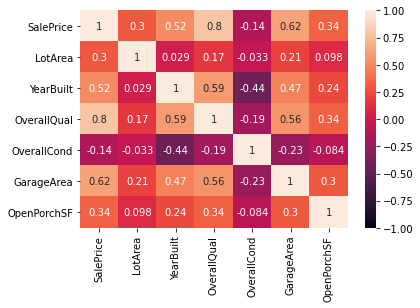

In [17]:
sns.heatmap(train2[["SalePrice","LotArea", 'YearBuilt','OverallQual', 'OverallCond', 'GarageArea', 'OpenPorchSF']].corr(), vmin=-1, vmax=1, annot= True)